In [1]:
import os

# ==============================================================================
# 0. Must set R path BEFORE importing rpy2!
# ==============================================================================
# Your Conda R environment path (please ensure this path is correct)
conda_env_path = "/home/hice1/kyan66/scratch/r_kernel"

# 1. Set R_HOME (tell Python where R's home directory is)
os.environ['R_HOME'] = f"{conda_env_path}/lib/R"

# 2. Set PATH (tell Python where R's executable commands are)
os.environ['PATH'] = f"{conda_env_path}/bin:" + os.environ.get('PATH', '')

# 3. Set LD_LIBRARY_PATH (tell Python where R's dynamic libraries are)
os.environ['LD_LIBRARY_PATH'] = f"{conda_env_path}/lib:" + os.environ.get('LD_LIBRARY_PATH', '')

print(f"✅ R environment path configured: {os.environ['R_HOME']}")

✅ R environment path configured: /home/hice1/kyan66/scratch/r_kernel/lib/R


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter
import seaborn as sns
from skbio.diversity import alpha_diversity
from datetime import datetime
import random

# # 3. 计算与提取
# with localconverter(robjects.default_converter + pandas2ri.converter):
#     result = vegan.specaccum(df, method="random")
    
#     # 【终极修正】
#     # 既然报错说 'method' object is not iterable，说明 names 是个方法
#     # 我们加上括号 () 来调用它！
#     keys = result.names # 先不加括号试试... 不，刚才就是这里报错
#     # 正确写法：尝试获取 keys，如果不幸它是方法，就调用它
    
#     try:
#         # 尝试方案 A: 它是属性 (Tuple/List)
#         the_keys = result.names
#         # 如果它是 method，这行下面会报错，或者在 zip 时报错
#         if callable(the_keys): 
#             the_keys = the_keys() # 如果是方法，就调用它
#     except:
#         # 尝试方案 B: 它是 keys() 方法
#         the_keys = result.keys()
        
#     print(f"提取到的键: {the_keys}")
    
#     # 组合成字典
#     result_dict = dict(zip(the_keys, result))
    
#     # 提取数据
#     sites = np.array(result_dict['sites'])
#     richness = np.array(result_dict['richness'])
#     sd = np.array(result_dict['sd'])

# print(f"计算完成！最终 Richness: {richness[-1]:.2f}")

# # 4. 画图
# plt.figure(figsize=(10, 6))
# plt.plot(sites, richness, 'o-', color='#1f77b4', markersize=4)
# plt.title("Species Accumulation Curve")
# plt.xlabel("Sites")
# plt.ylabel("Richness")
# plt.grid(True, linestyle=':', alpha=0.6)
# plt.show()

In [3]:
import torch
import socket

print(f"Current hostname: {socket.gethostname()}")
print(f"Is CUDA available: {torch.cuda.is_available()}")

if torch.cuda.is_available():
    print(f"GPU name: {torch.cuda.get_device_name(0)}")
    print("🎉 Congratulations! Your uv environment successfully accessed the compute node's GPU!")
else:
    print("❌ GPU not detected. Please check the salloc command.")

Current hostname: atl1-1-01-005-2-1.pace.gatech.edu
Is CUDA available: False
❌ GPU not detected. Please check the salloc command.


In [4]:
save_dir = 'data/ssusa'
os.makedirs(save_dir, exist_ok=True)

# Show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)

In [5]:
# Define the directory path
data_dir = save_dir
df_path = data_dir + r'/cleaned_snapshot_usa_iucn.csv'


In [6]:
df = pd.read_csv(df_path)

/tmp/ipykernel_4172795/2810494364.py:1: DtypeWarning: Columns (0: Sequence_ID) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(df_path)


In [7]:
df.head(10)

,Year,Project,Camera_Trap_Array,Deployment_ID,Sequence_ID,Start_Time,End_Time,Class,Order,Family,Genus,Species,Common_Name,Sci_Name,Age,Sex,Group_Size,Site_Name,Start_Date,End_Date,Survey_Nights,Latitude,Longitude,Habitat,Development_Level,Feature_Type
0,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s1,2019-08-31 06:50:00,2019-08-31 06:50:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
1,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s2,2019-08-31 14:15:00,2019-08-31 14:17:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
2,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s3,2019-08-31 18:22:00,2019-08-31 18:22:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
3,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,adult,female,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
4,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s4,2019-08-31 20:58:00,2019-08-31 20:58:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,juvenile,unknown,2,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
5,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s5,2019-09-02 19:18:00,2019-09-02 19:18:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
6,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s6,2019-09-02 19:57:00,2019-09-02 19:57:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
7,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s7,2019-09-02 21:44:00,2019-09-02 21:44:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
8,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s8,2019-09-02 23:44:00,2019-09-02 23:44:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source
9,2019,Snapshot USA 2019,Crupi,AK_Forest_Chilkat_Preserve_1,d58722s9,2019-09-03 06:55:00,2019-09-03 06:55:00,mammalia,carnivora,ursidae,ursus,arctos,brown bear,ursus arctos,unknown,unknown,1,AK_Forest_Crupi_21_dep_01,2019-08-31,2019-11-03,64.0,59.42643,-136.2225,forest,wild,water source


In [8]:
def get_species_matrix(df, unit_col, species_col='Sci_Name'):
    """
    Converts dataframe to a presence/absence matrix (Sampling Unit x Species).
    
    Parameters:
    - df: pandas DataFrame containing the data
    - unit_col: column name for sampling unit (can be Site, Year, Location, Year_Month, etc.)
    - species_col: column name for species identification (default: 'Sci_Name')
    
    Returns:
    - Binary matrix where rows are sampling units and columns are species (1=present, 0=absent)
    """
    # Filter valid species and sampling units
    valid_data = df.dropna(subset=[species_col, unit_col])
    valid_data = valid_data[valid_data[species_col] != ""]

    # Create pivot table (Count occurrences)
    matrix = pd.crosstab(valid_data[unit_col], valid_data[species_col])

    # Convert to binary Presence/Absence (1/0)
    matrix = (matrix > 0).astype(int)

    return matrix

In [9]:
def species_accumulation(matrix, method='random', permutations=100):
    """
    Uses R's vegan::specaccum function for species accumulation.
    
    Parameters:
    - matrix: binary pandas DataFrame (Rows=Samples, Cols=Species)
    - method: 'random' (permuted) or 'collector' (chronological/input order)
    - permutations: number of permutations for random method

    Returns:
    - dict containing 'sites' (x-axis), 'richness' (y-axis), and 'sd' (standard deviation)
    """
    
    # Load vegan package
    vegan = importr('vegan')
    
    # Convert pandas DataFrame to R data frame
    with localconverter(pandas2ri.converter + robjects.default_converter):
        r_matrix = pandas2ri.py2rpy(matrix)
        
        # Call vegan::specaccum
        if method == 'random':
            result = vegan.specaccum(r_matrix, method='random', permutations=permutations)
        else:  # collector
            result = vegan.specaccum(r_matrix, method='collector')
    
    # Extract results from R object
    with localconverter(pandas2ri.converter + robjects.default_converter):
        sites = np.array(robjects.r('as.numeric')(result.rx2('sites')))
        richness = np.array(robjects.r('as.numeric')(result.rx2('richness')))
        sd = np.array(robjects.r('as.numeric')(result.rx2('sd')))
    
    return {
        'sites': sites,
        'richness': richness,
        'sd': sd
    }

def plot_sac(sac_data, title, xlabel="Sampling units"):
    """Publication-quality plotting function for species accumulation curves"""
    x = sac_data['sites']
    y = sac_data['richness']
    sd = sac_data['sd']

    # Create figure with higher DPI for publication quality
    fig, ax = plt.subplots(figsize=(10, 7), dpi=300)
    
    # Set style for publication
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Plot Confidence Interval (Mean +/- 2 SD approx 95% CI)
    if np.any(sd > 0):
        ax.fill_between(x, y - 2*sd, y + 2*sd, 
                        color='#2E86AB', alpha=0.2, 
                        label='95% Confidence Interval',
                        edgecolor='#2E86AB', linewidth=0.5)
    
    # Plot Mean Line with markers
    ax.plot(x, y, color='#A23B72', linewidth=2.5, 
            marker='o', markersize=6, markerfacecolor='white',
            markeredgewidth=2, markeredgecolor='#A23B72',
            label='Species Richness', zorder=3)
    
    # Enhance grid
    ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)
    ax.set_axisbelow(True)
    
    # Labels and title with better formatting
    ax.set_xlabel(xlabel, fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel("Accumulated Species Richness", fontsize=14, fontweight='bold', labelpad=10)
    ax.set_title(title, fontsize=16, fontweight='bold', pad=20)
    
    # Improve tick labels
    ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)
    
    # Add legend with better formatting
    ax.legend(loc='lower right', frameon=True, fancybox=True, 
             shadow=True, fontsize=11, framealpha=0.95)
    
    # Set spine width
    for spine in ax.spines.values():
        spine.set_linewidth(1.5)
    
    # Tight layout for better spacing
    plt.tight_layout()
    plt.show()

In [10]:
# Ensure Year is integer (handle NaNs if necessary)
df = df.dropna(subset=['Year'])
df['Year'] = df['Year'].astype(int)

# Extract Arrays with 5 years of data
# R logic: group by Array, get unique years, count them
years_per_array = df[df['Camera_Trap_Array'].notna()].groupby('Camera_Trap_Array')['Year'].unique()
arrays_5_years = years_per_array[years_per_array.apply(len) == 5].index.tolist()

print(f"Found {len(arrays_5_years)} arrays with 5 years of data.")

# Filter main dataframe
df_arrays_5_years = df[df['Camera_Trap_Array'].isin(arrays_5_years)].copy()

# Add Month Column from End_Date
df_arrays_5_years['End_Date'] = pd.to_datetime(df_arrays_5_years['End_Date'])
df_arrays_5_years['Month'] = df_arrays_5_years['End_Date'].dt.strftime('%m')

print(df_arrays_5_years[['Camera_Trap_Array', 'Year', 'Month']].head())

Found 41 arrays with 5 years of data.
  Camera_Trap_Array  Year Month
0             Crupi  2019    11
1             Crupi  2019    11
2             Crupi  2019    11
3             Crupi  2019    11
4             Crupi  2019    11


Selected Camera_Trap_Array: Herrera
Matrix shape: (5, 17)


R callback write-console: 'nperm' >= set of all permutations: complete enumeration.
  
R callback write-console: Set of permutations < 'minperm'. Generating entire set.
  


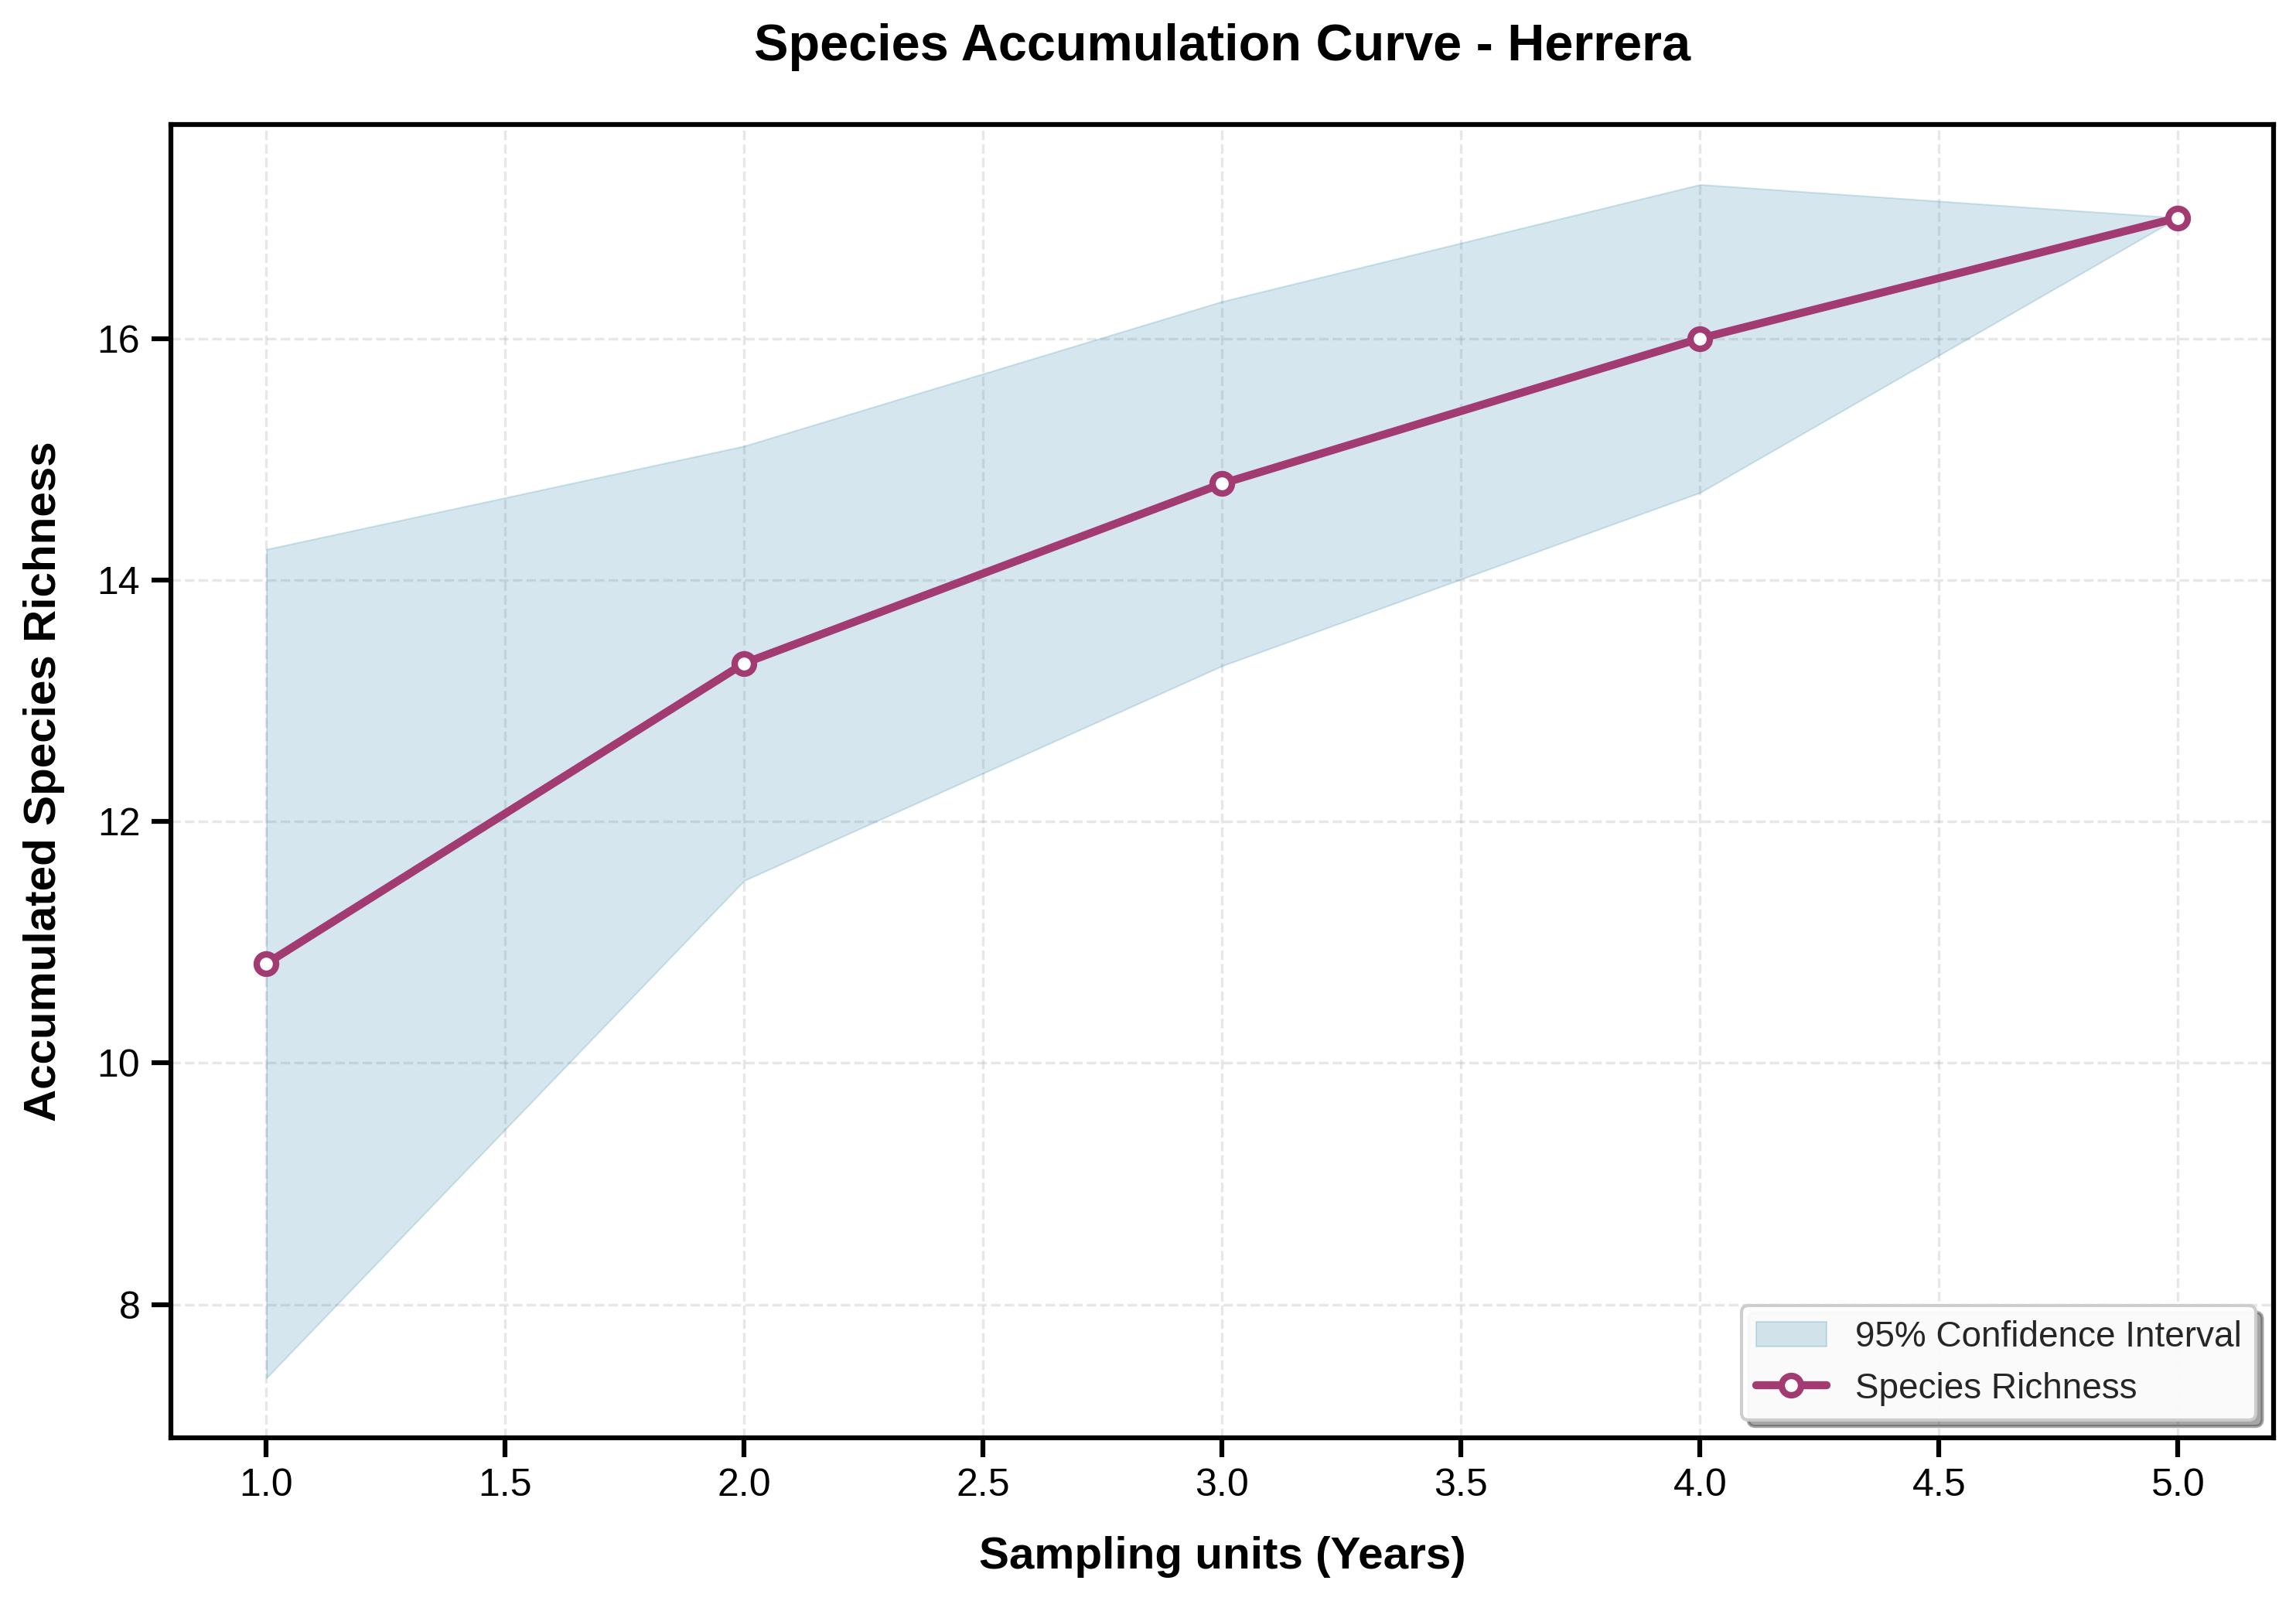

Observed richness: 17.0


In [11]:
# select array with most records (or manual selection)
selected_array = df_arrays_5_years['Camera_Trap_Array'].value_counts().idxmax()
# selected_array = "Herrera" # Manual override if needed

print(f"Selected Camera_Trap_Array: {selected_array}")

# Subset data
df_array = df_arrays_5_years[df_arrays_5_years['Camera_Trap_Array'] == selected_array]

# Create Matrix: Site = Year, Species = Sci_Name
# Note: In the R code, rows were Years.
mat_year = get_species_matrix(df_array, unit_col='Year', species_col='Sci_Name')

# Sort by index (Year) for consistent 'collector' plotting later
mat_year = mat_year.sort_index()

print(f"Matrix shape: {mat_year.shape}")

# Calculate Randomized Accumulation
acc_rand_year = species_accumulation(mat_year, method='random', permutations=1000)

# Plot
plot_sac(acc_rand_year,
         title=f"Species Accumulation Curve - {selected_array}",
         xlabel="Sampling units (Years)")

print(f"Observed richness: {acc_rand_year['richness'][-1]}")

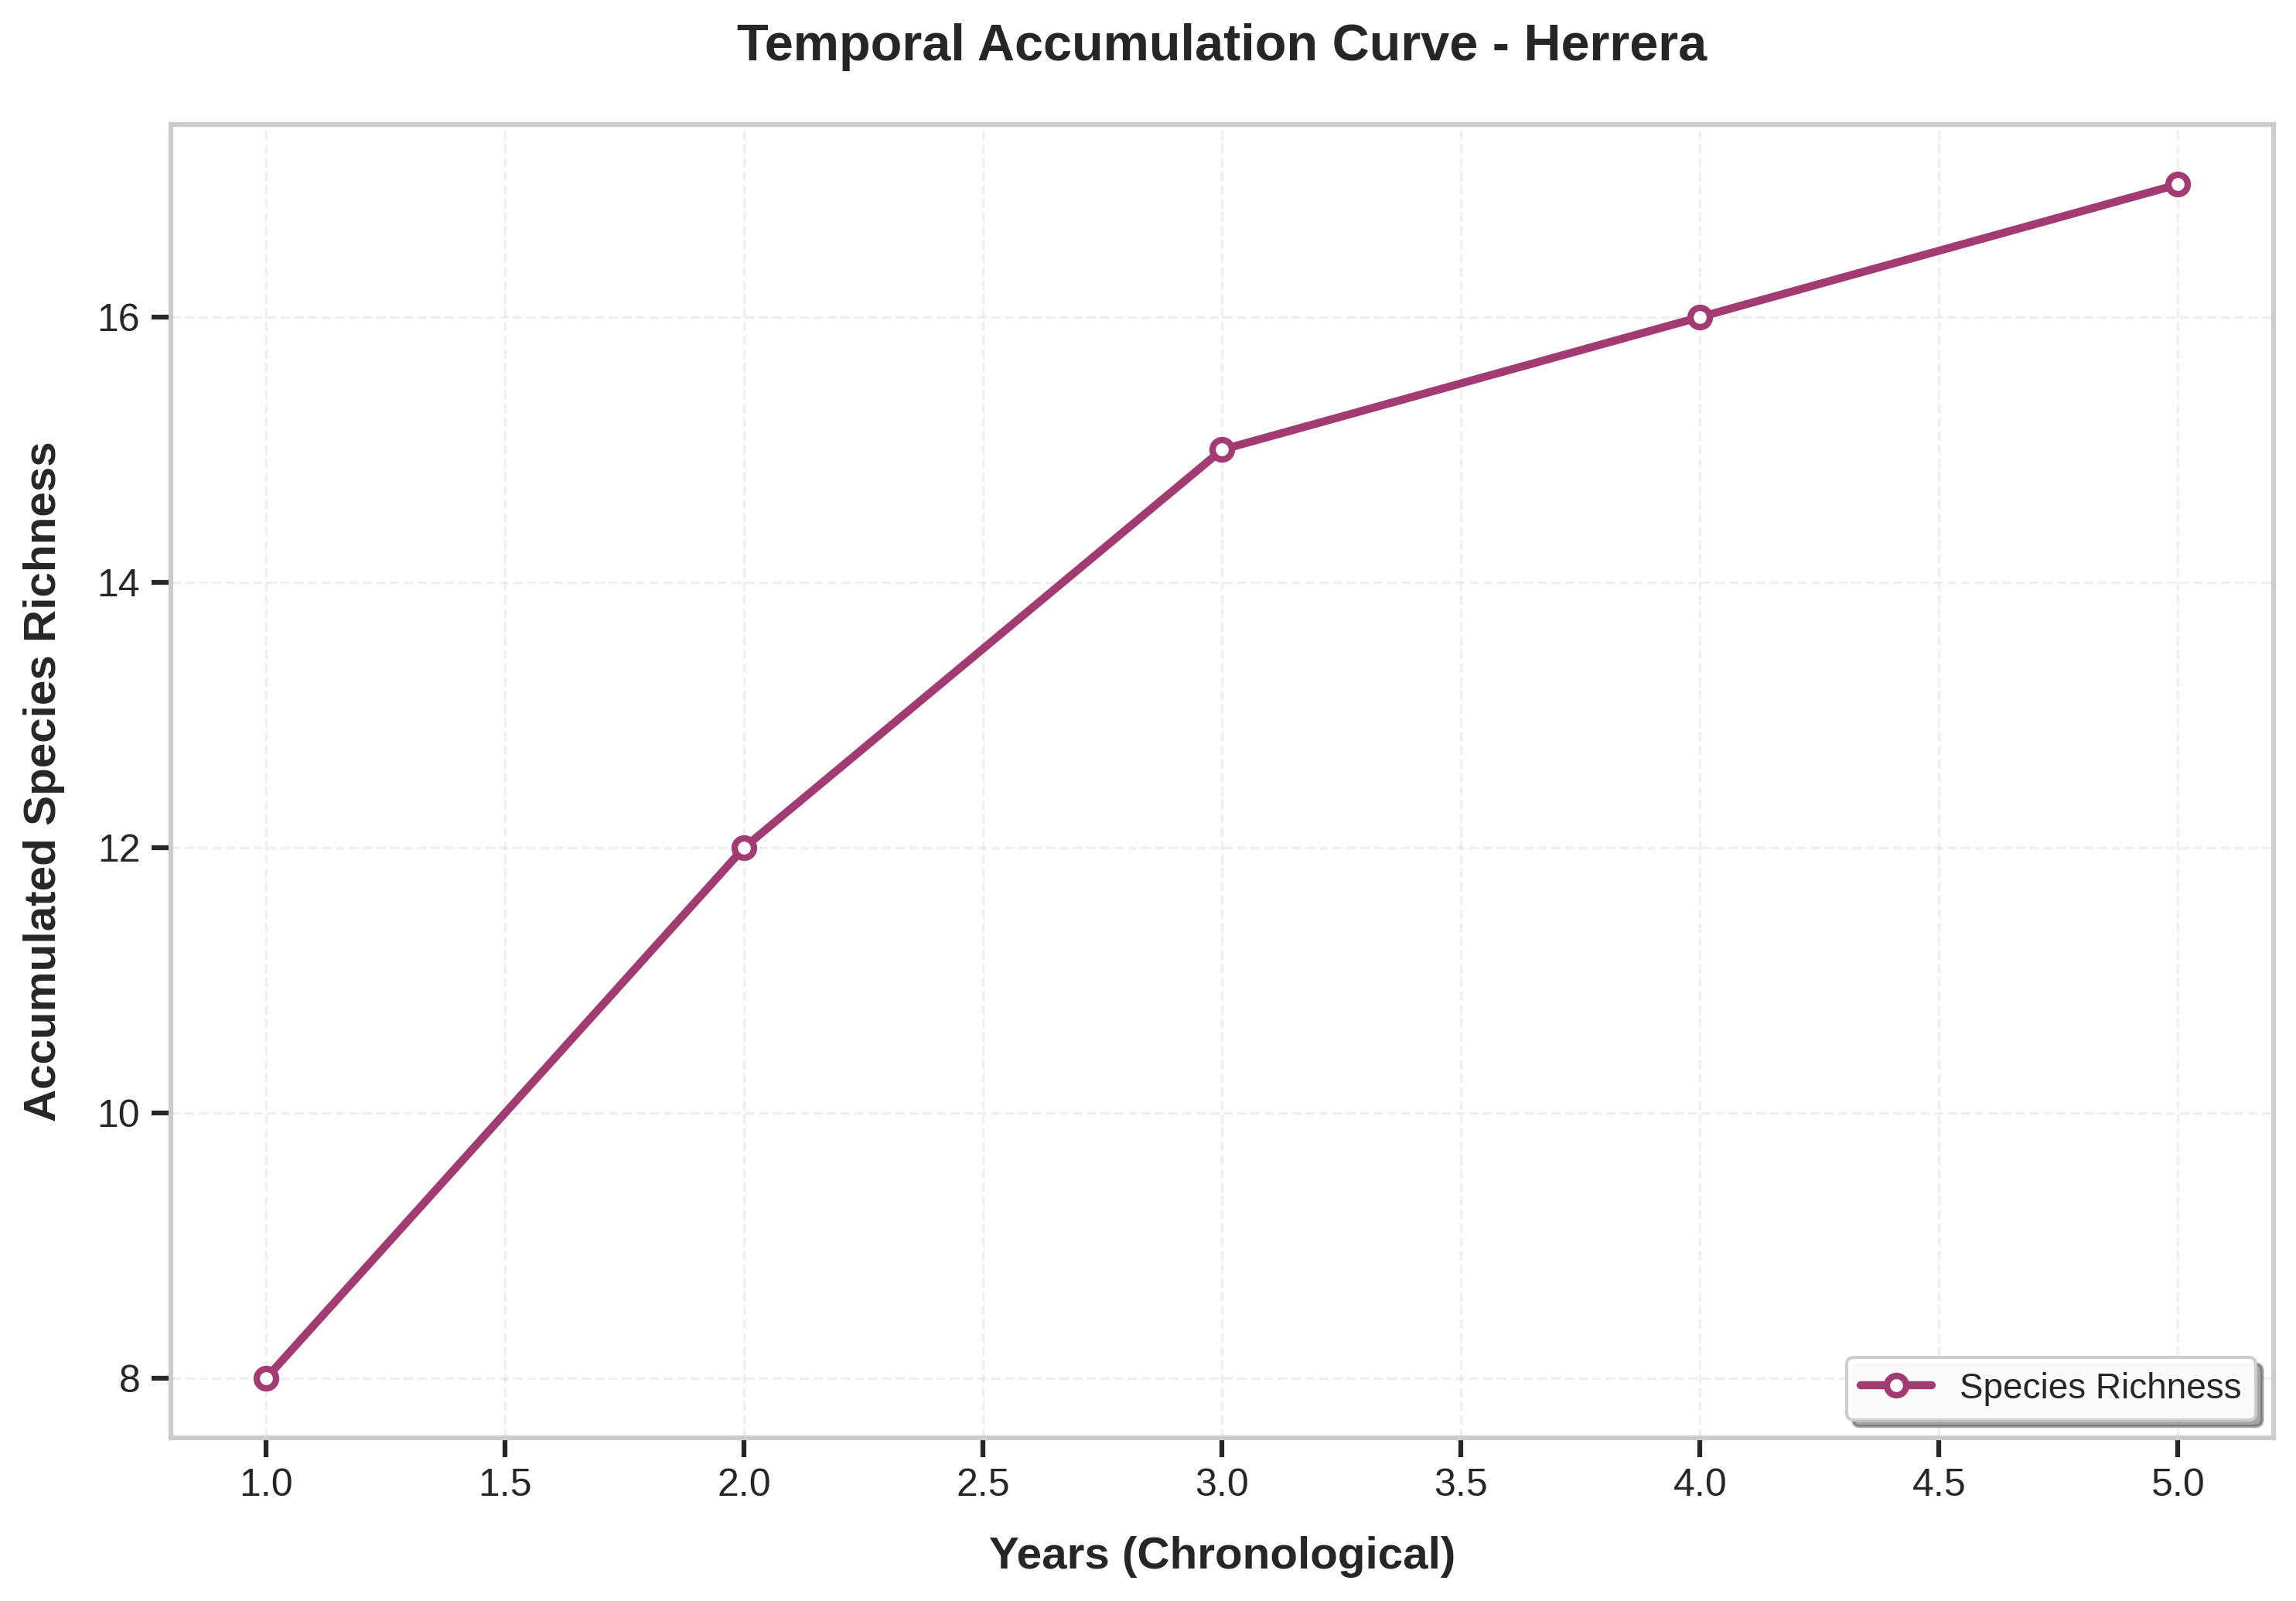

In [12]:
# Calculate Collector Accumulation
acc_col_year = species_accumulation(mat_year, method='collector')

# Plot
plot_sac(acc_col_year,
         title=f"Temporal Accumulation Curve - {selected_array}",
         xlabel="Years (Chronological)")

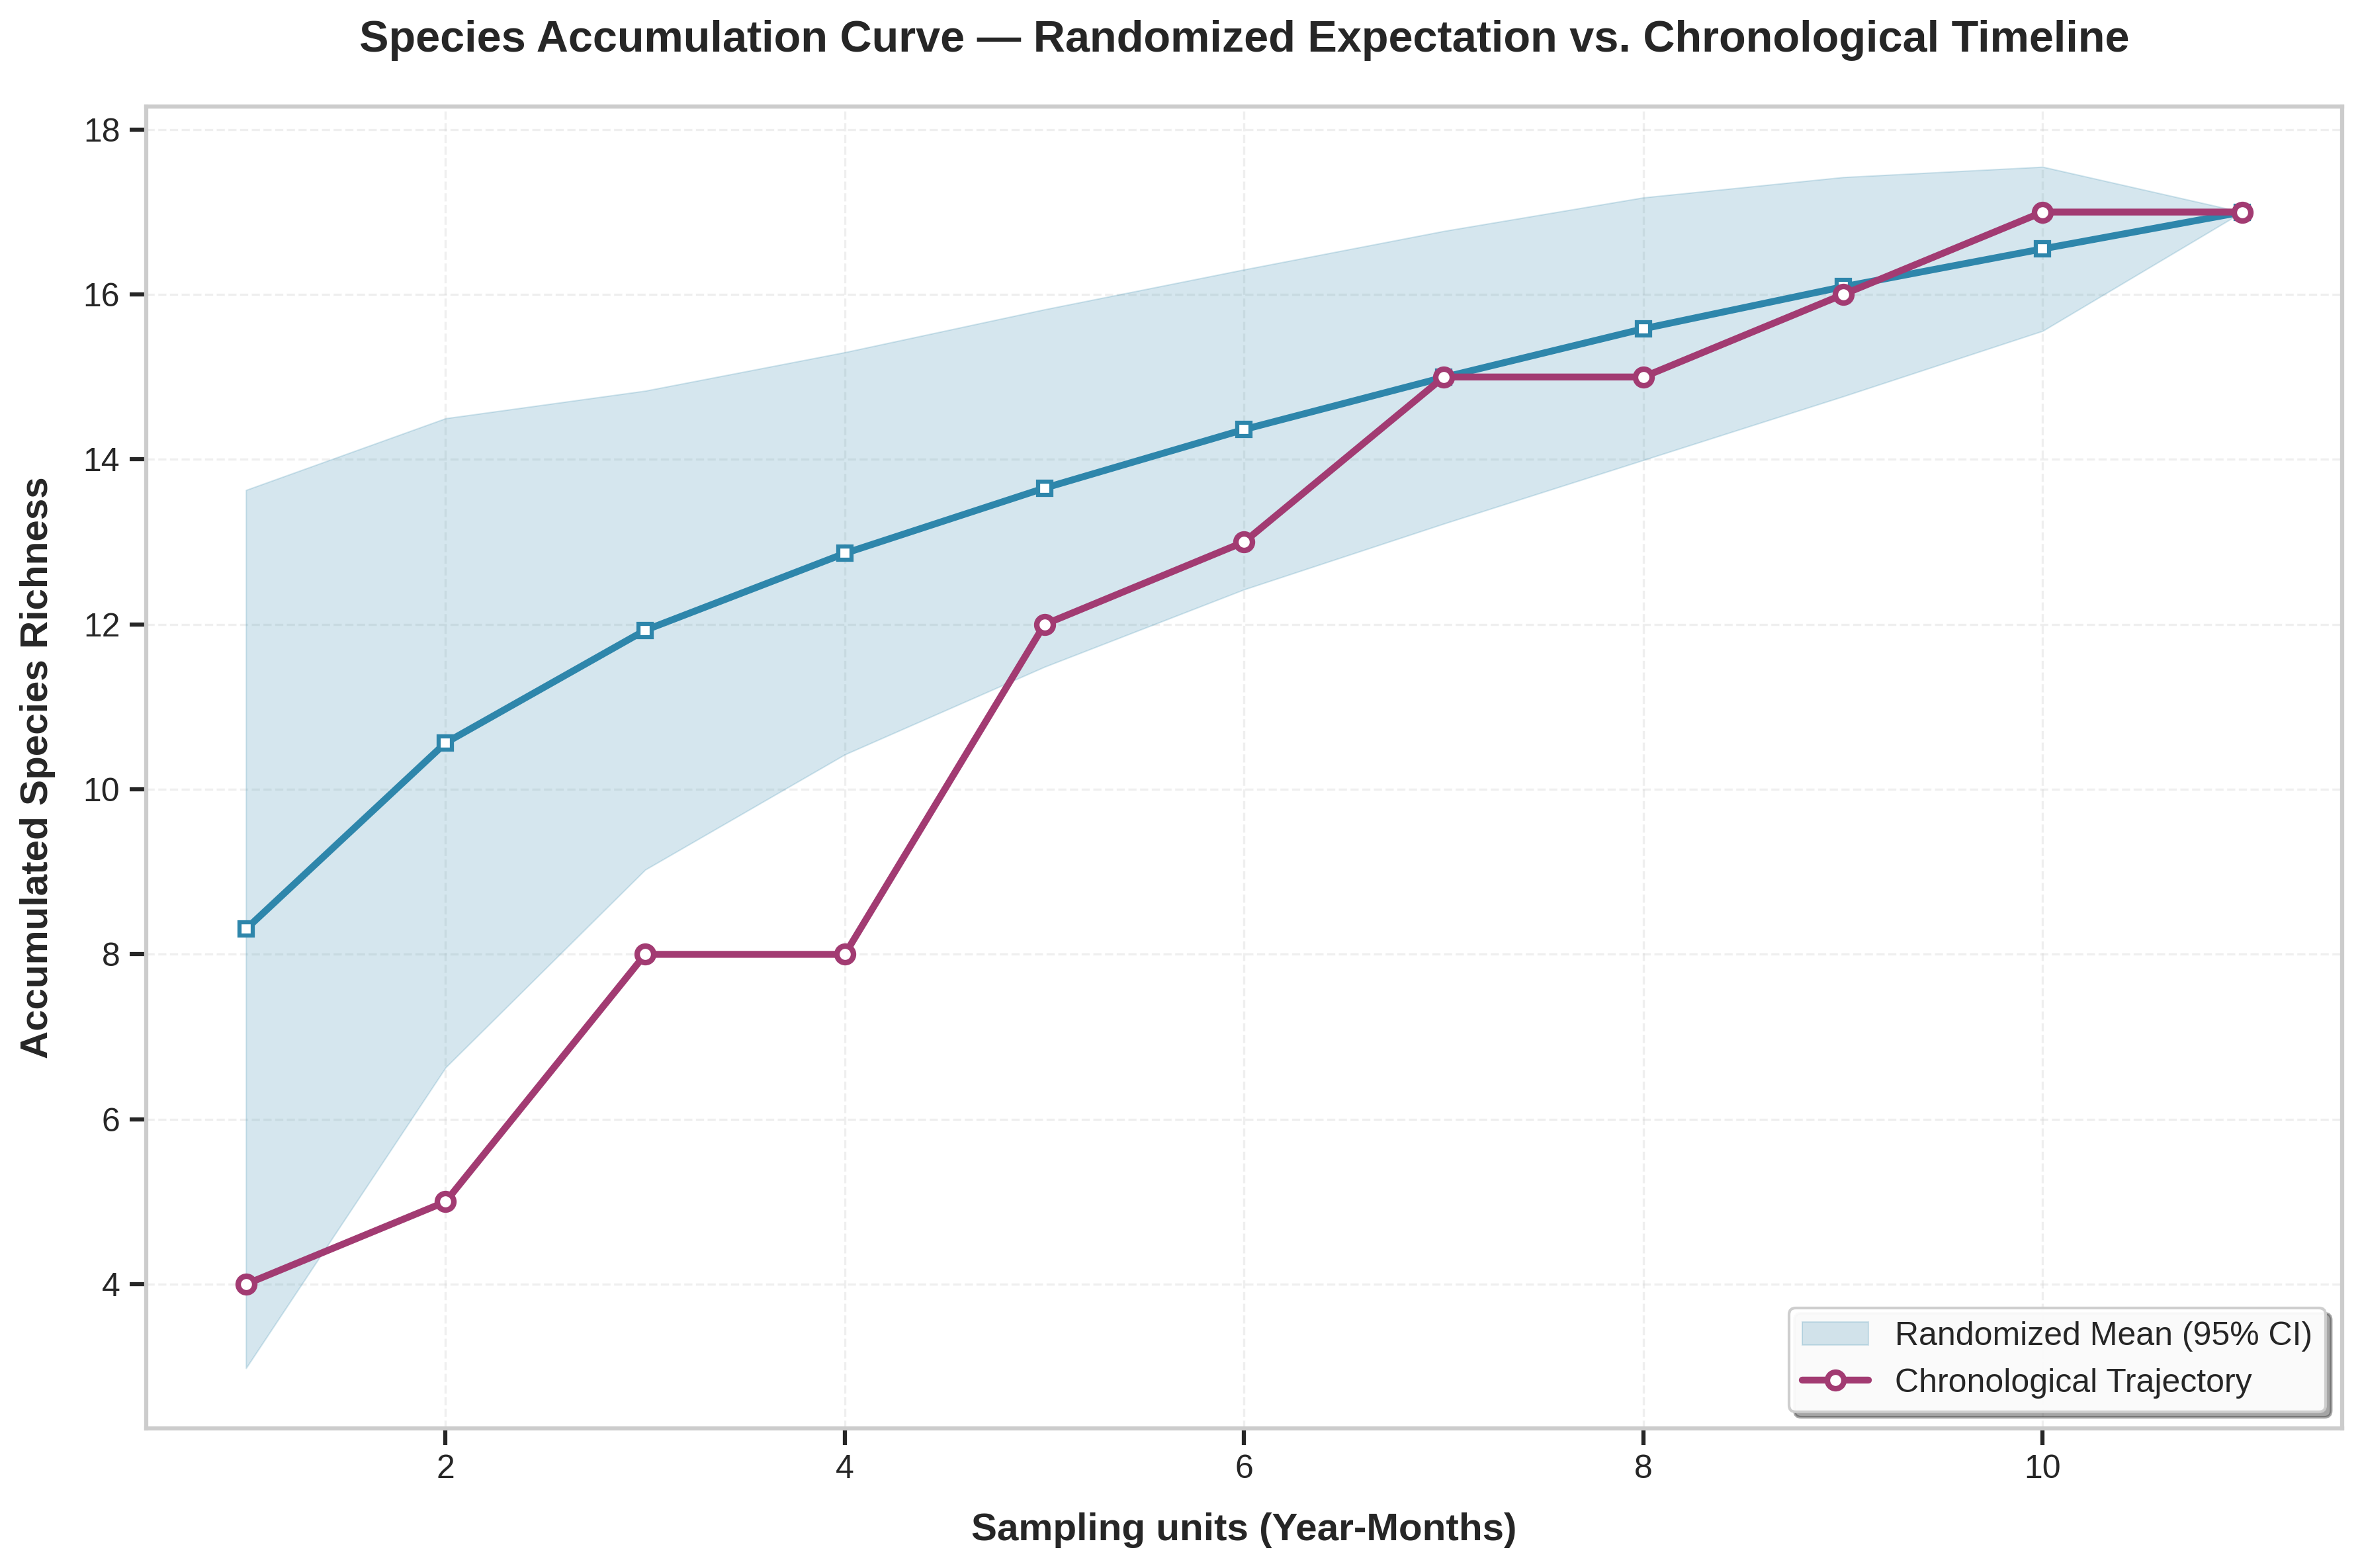

In [13]:
# Create a Year-Month column for granularity
df_array = df_array.copy() # Avoid SettingWithCopyWarning
df_array['Year_Month'] = df_array['Year'].astype(str) + "-" + df_array['Month']

# Create Matrix
mat_month = get_species_matrix(df_array, unit_col='Year_Month')
mat_month = mat_month.sort_index() # Sort chronologically

# Randomized
acc_rand_month = species_accumulation(mat_month, method='random', permutations=1000)

# Chronological
acc_time_month = species_accumulation(mat_month, method='collector')

# Combined Plot with publication-quality styling
fig, ax = plt.subplots(figsize=(12, 8), dpi=300)

# Set style for publication
plt.style.use('seaborn-v0_8-whitegrid')

# Plot Random (with fill)
x = acc_rand_month['sites']
y = acc_rand_month['richness']
sd = acc_rand_month['sd']

# Confidence interval for randomized
ax.fill_between(x, y - 2*sd, y + 2*sd, 
                color='#2E86AB', alpha=0.2, 
                label='Randomized Mean (95% CI)',
                edgecolor='#2E86AB', linewidth=0.5)

# Randomized mean line with markers
ax.plot(x, y, color='#2E86AB', linewidth=2.5, 
        marker='s', markersize=5, markerfacecolor='white',
        markeredgewidth=1.5, markeredgecolor='#2E86AB', zorder=3)

# Plot Collector (Line + Points)
ax.plot(acc_time_month['sites'], acc_time_month['richness'],
        color='#A23B72', linewidth=2.5, 
        marker='o', markersize=6, markerfacecolor='white',
        markeredgewidth=2, markeredgecolor='#A23B72',
        label='Chronological Trajectory', zorder=3)

# Enhance grid
ax.grid(True, linestyle='--', alpha=0.3, linewidth=0.8)
ax.set_axisbelow(True)

# Labels and title with better formatting
ax.set_xlabel("Sampling units (Year-Months)", fontsize=14, fontweight='bold', labelpad=10)
ax.set_ylabel("Accumulated Species Richness", fontsize=14, fontweight='bold', labelpad=10)
ax.set_title("Species Accumulation Curve — Randomized Expectation vs. Chronological Timeline", 
             fontsize=16, fontweight='bold', pad=20)

# Improve tick labels
ax.tick_params(axis='both', which='major', labelsize=12, length=6, width=1.5)

# Add legend with better formatting
ax.legend(loc='lower right', frameon=True, fancybox=True, 
         shadow=True, fontsize=12, framealpha=0.95)

# Set spine width
for spine in ax.spines.values():
    spine.set_linewidth(1.5)

# Tight layout for better spacing
plt.tight_layout()
plt.show()